# Import Library

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image

# Define facies colors, label

In [0]:
# 1=sandstone  2=c_siltstone   3=f_siltstone # 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite # 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D','PS', 'BS']

#facies_color_map is a dictionary that maps facies labels to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]

# Define plot

In [0]:
def make_facies_log_plot2(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(10, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    ax[5].plot(logs.NM_M, logs.Depth, '--', color='black')
    ax[6].plot(logs.RELPOS, logs.Depth, '--', color='black')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((12*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))##17-->12
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel("NM_M")
    ax[5].set_xlim(logs.NM_M.min()-0.05,logs.NM_M.max())
    ax[6].set_xlabel("RELPOS")
    ax[6].set_xlim(logs.RELPOS.min(),logs.RELPOS.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([])
    ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

# Define confusion matrix

In [0]:
def plot_confusion_matrix(conf, cmap=plt.cm.Blues):
    cm = conf
    classes = facies_labels
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Import Drive

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
cd /content/gdrive/My\ Drive/UAE2019/Facies/

/content/gdrive/My Drive/UAE2019/Facies


In [7]:
ls

aa.png            ex2_Facies_xgboost.ipynb        old/           train_data.csv
ex1_Facies.ipynb  ex3_Facies_augumentation.ipynb  test_data.csv


# Import Data

In [0]:
train = pd.read_csv('train_data.csv')

## The 'Well Name' and 'Formation' columns can be turned into a categorical data type.
train['Well Name'] = train['Well Name'].astype('category')
train['Formation'] = train['Formation'].astype('category')


train.loc[:,'FaciesLabels'] = train.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [9]:
train.head(3)

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,FaciesLabels
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,FSiS
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,FSiS
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,FSiS


# Plot well log
* SHRIMPLIN
* LUKE G U
* CROSS H CATTLE
* NOLAN
* Recruit F9
* NEWBY
*CHURCHMAN BIBLE

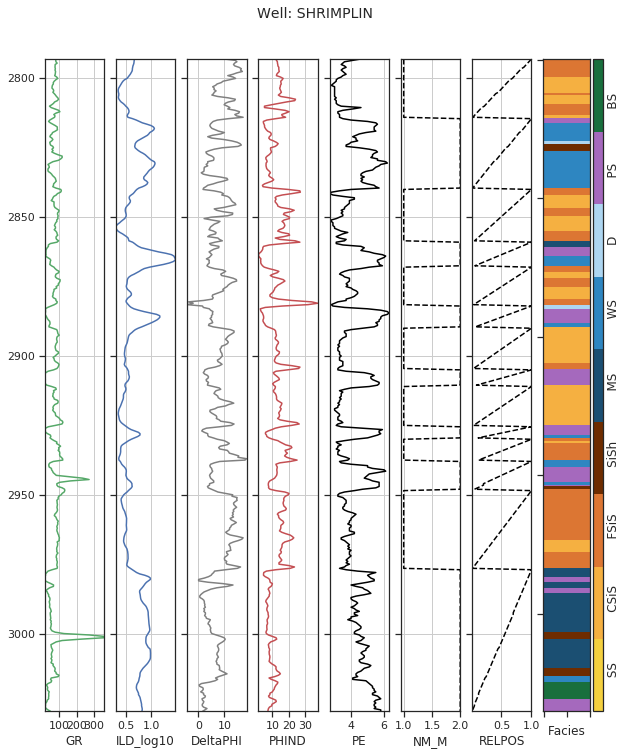

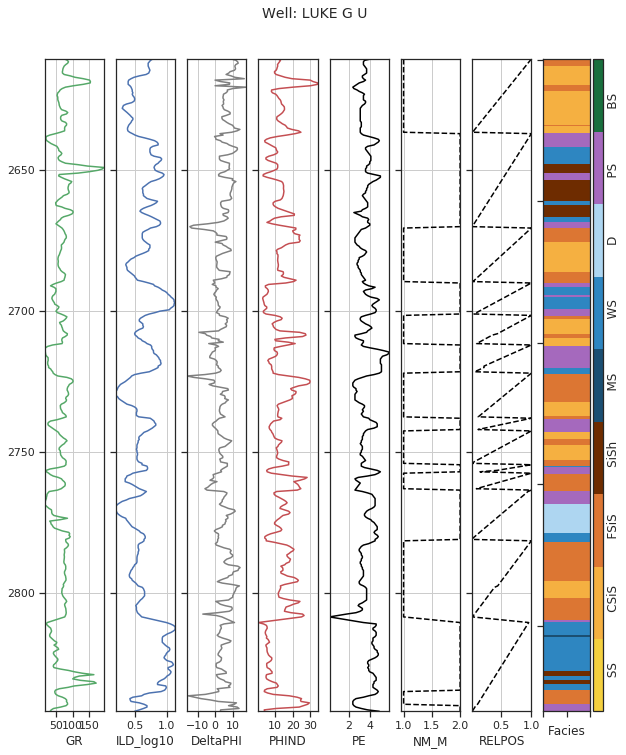

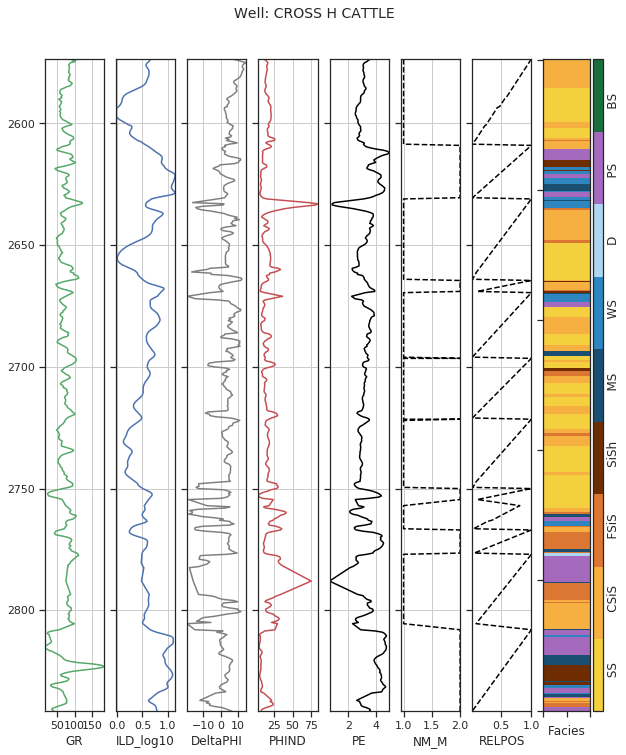

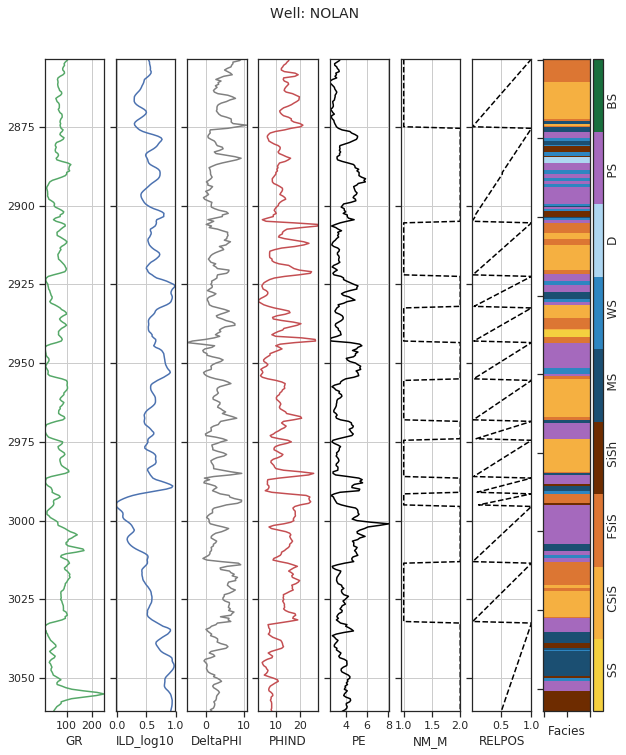

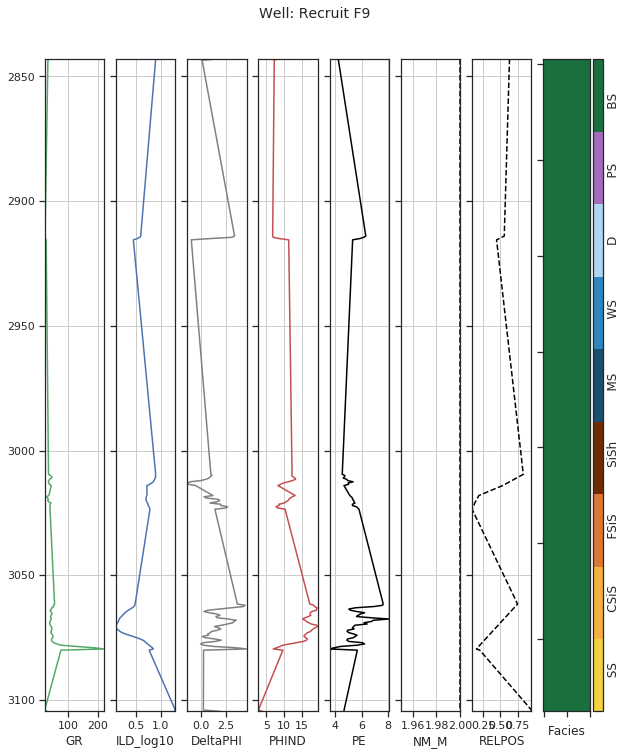

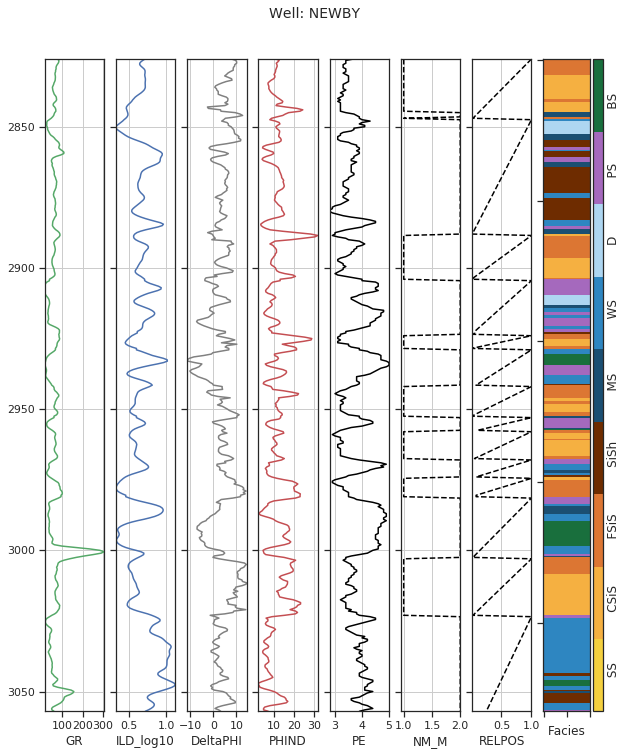

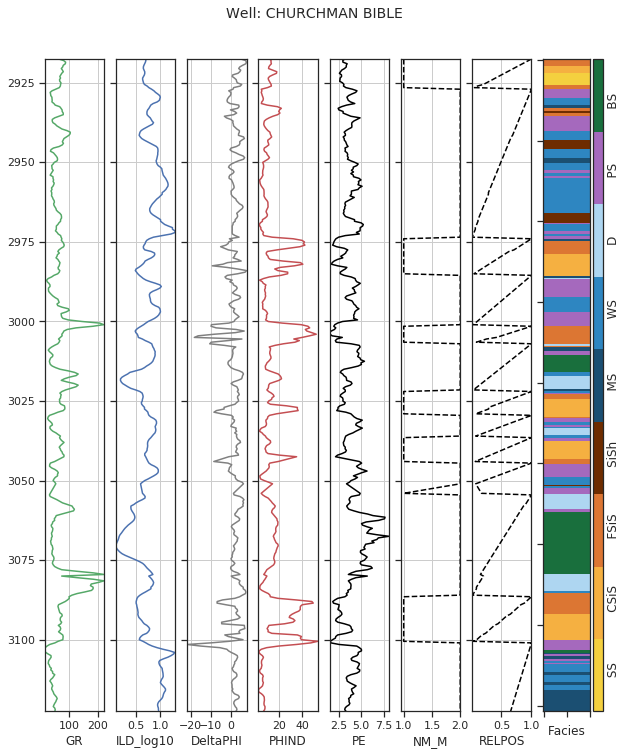

In [30]:
make_facies_log_plot2(train[train['Well Name'] == 'SHRIMPLIN'], facies_colors)
make_facies_log_plot2(train[train['Well Name'] == 'LUKE G U'], facies_colors)
make_facies_log_plot2(train[train['Well Name'] == 'CROSS H CATTLE'], facies_colors)
make_facies_log_plot2(train[train['Well Name'] == 'NOLAN'], facies_colors)
make_facies_log_plot2(train[train['Well Name'] == 'Recruit F9'], facies_colors)
make_facies_log_plot2(train[train['Well Name'] == 'NEWBY'], facies_colors)
make_facies_log_plot2(train[train['Well Name'] == 'CHURCHMAN BIBLE'], facies_colors)

# Plot a histogram of the number of  each facies class.
## Dolomite (facies 7) has the fewest with 81 examples. 


SS      170
CSiS    649
FSiS    498
SiSh    177
MS      198
WS      391
D        81
PS      458
BS      161
Name: Facies, dtype: int64

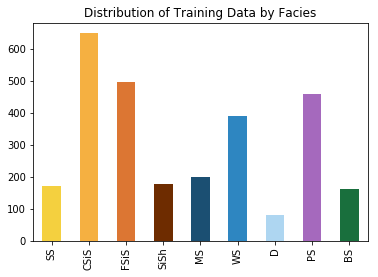

In [10]:
#count the number of unique entries for each facies, sort them by #facies number (instead of by number of entries)
facies_counts = train['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, title='Distribution of Training Data by Facies')
facies_counts

# Correlation coefficients
## e.g. ILD_log10 and PHIND are highly anti-correlated.

In [11]:
d=train.drop(['Facies','Formation','Well Name','Depth','FaciesLabels'],axis=1)
d.corr(method='pearson') #spearman

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
GR,1.000000,-0.172861,0.213374,0.270165,-0.323830,-0.293871,-0.168637
ILD_log10,-0.172861,1.000000,-0.139813,-0.527447,0.348371,0.507064,0.102377
DeltaPHI,0.213374,-0.139813,1.000000,-0.178954,-0.042708,-0.233040,0.019186
PHIND,0.270165,-0.527447,-0.178954,1.000000,-0.545571,-0.482639,-0.026352
PE,-0.323830,0.348371,-0.042708,-0.545571,1.000000,0.646854,0.014080
NM_M,-0.293871,0.507064,-0.233040,-0.482639,0.646854,1.000000,0.039582
RELPOS,-0.168637,0.102377,0.019186,-0.026352,0.014080,0.039582,1.000000


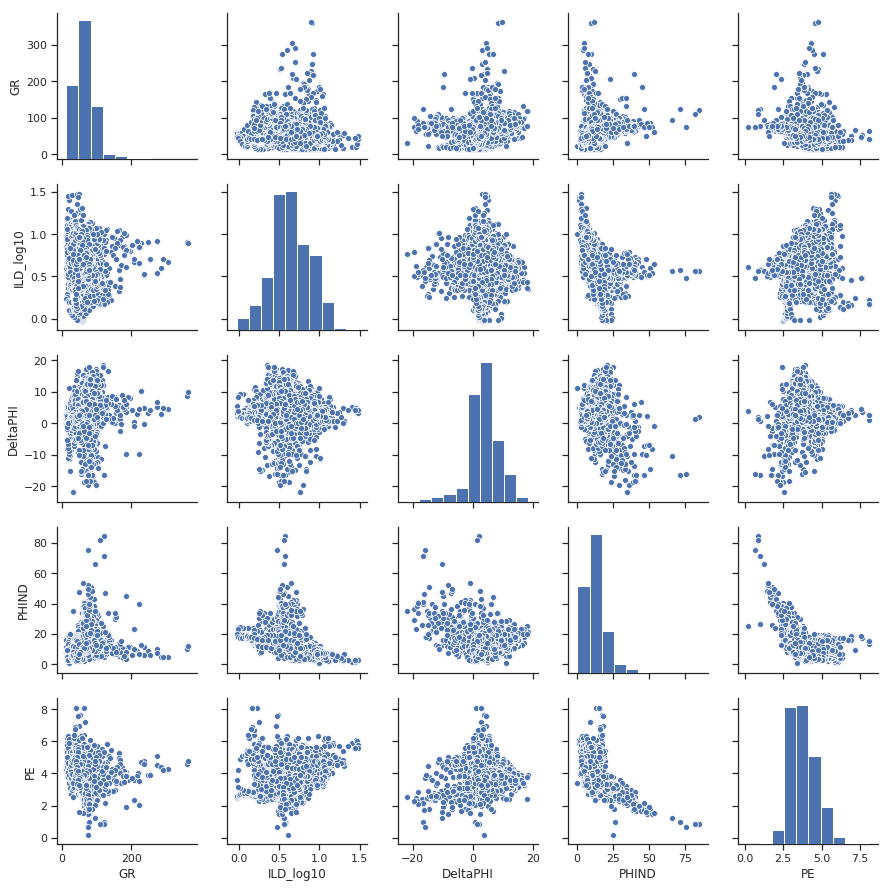

In [12]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
d=train.drop(['Well Name','Facies','Formation','Depth', 'NM_M','RELPOS' ],axis=1) #'NM_M','RELPOS'
PAIR=sns.pairplot(d, dropna=True)
#sns.pairplot(d, dropna=True, hue='FaciesLabels', palette=facies_color_map, hue_order=list(reversed(facies_labels)))
    
#PAIR.savefig('/content/gdrive/My Drive/UAE2019/Facies/aa.png')

# Train data

In [0]:
y = train['Facies'].values
X = train.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)

# Test data

In [0]:
tdata = 'test_data.csv'
test = pd.read_csv(tdata)

## The 'Well Name' and 'Formation' columns can be turned into a categorical data type.
test['Well Name'] = test['Well Name'].astype('category')
test['Formation'] = test['Formation'].astype('category')

y_t = test['Facies'].values
X_t = test.drop(['Formation', 'Well Name', 'Depth','Facies'], axis=1)

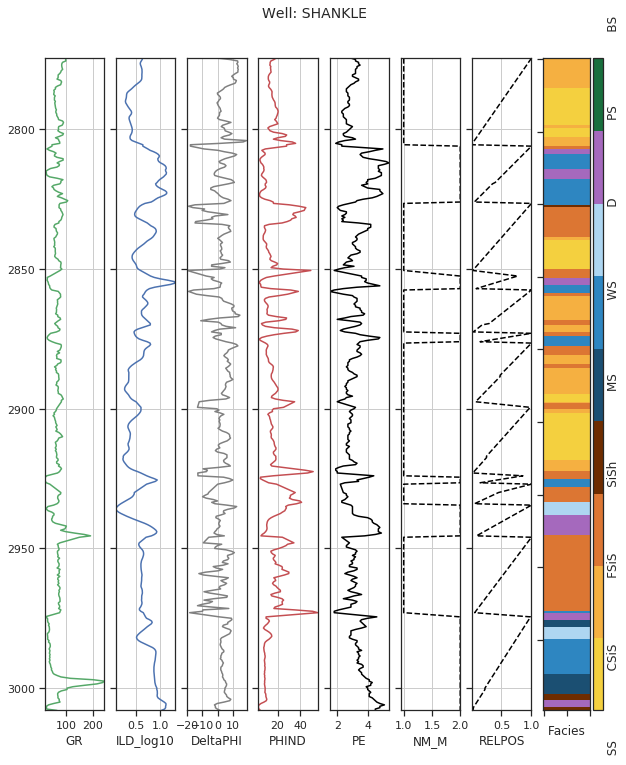

In [21]:
make_facies_log_plot2(test[test['Well Name'] == 'SHANKLE'], facies_colors)

# SVM RBF gamma=0.1, C=1

In [0]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([
        ("scaler", StandardScaler()),   
        ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1))
    ])

model.fit(X, y)

y_pred =model.predict(X_t)

# Plot confusion matrix

[[ 3 85  1  0  0  0  0  0]
 [ 0 76 13  0  0  0  0  0]
 [ 0 81 36  0  0  0  0  0]
 [ 0  0  0  1  0  6  0  0]
 [ 0  0  0  8  0  8  1  2]
 [ 0  0  1  5  0 56  0  9]
 [ 0  0  0  0  2  5  9  1]
 [ 0  0  0  0  3 17  2 18]]


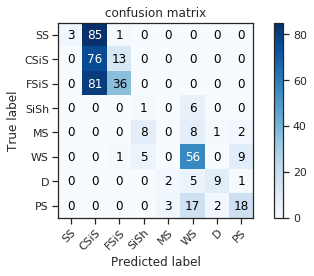

In [16]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_t, y_pred)

plot_confusion_matrix(conf)

# F1, Accuracy

In [17]:
from sklearn.metrics import f1_score
f1_score(y_t, y_pred, average='micro')

0.44320712694877507

In [18]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc
  
print('Facies classification accuracy = %f' % accuracy(conf))  

Facies classification accuracy = 0.443207


# Accuracy adjacent

* The boundaries between the facies classes are not all sharp, and some of them blend into one another. 

* The error within these 'adjacent facies' can also be calculated. 

* We define an array to represent the facies adjacent to each other. For facies label  i, adjacent_facies[i] is an array of the adjacent facies labels.

In [19]:
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])

def accuracy_adjacent(conf, adjacent_facies):
    nb_classes = conf.shape[0]
    total_correct = 0.
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
        for j in adjacent_facies[i]:
            if j< nb_classes: ##
                total_correct += conf[i][j] 
    return total_correct / sum(sum(conf))
  
  
print('Adjacent facies classification accuracy = %f' % accuracy_adjacent(conf, adjacent_facies))  

Adjacent facies classification accuracy = 0.953229


# SVM RBF gamma=1, C=10

Optimized facies classification accuracy = 0.46
Optimized adjacent facies classification accuracy = 0.88
[[10 61 18  0  0  0  0  0  0]
 [13 65 11  0  0  0  0  0  0]
 [ 2 50 64  1  0  0  0  0  0]
 [ 0  0  0  1  0  6  0  0  0]
 [ 0  0  0  3  2  2  0 10  2]
 [ 0  0  3  5 10 38  0 15  0]
 [ 0  0  4  2  1  0  3  7  0]
 [ 0  0  0  0  1 11  3 24  1]
 [ 0  0  0  0  0  0  0  0  0]]


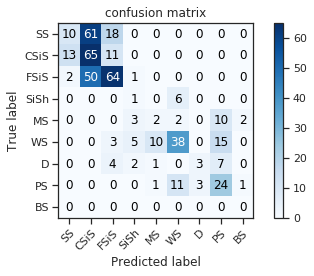

In [20]:
model = Pipeline([
        ("scaler", StandardScaler()),   
        ("svm_clf", SVC(kernel="rbf", gamma=1, C=10))
    ])

model.fit(X, y)

y_pred =model.predict(X_t)

conf = confusion_matrix(y_t, y_pred)

print('Optimized facies classification accuracy = %.2f' % accuracy(conf))
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(conf, adjacent_facies))

plot_confusion_matrix(conf)

# Define plot(compare facies)

In [0]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1 = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    ax[6].set_xlabel(compadre)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

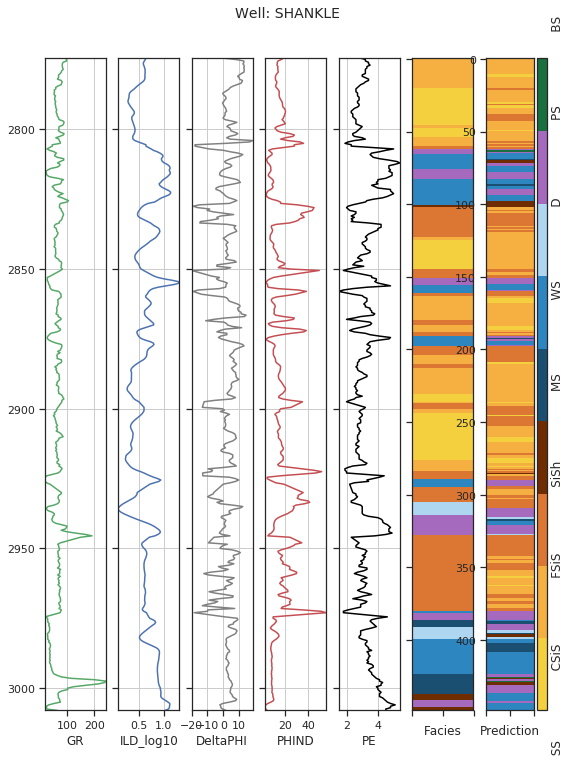

In [0]:
test['Prediction'] = y_pred
compare_facies_plot(test, 'Prediction', facies_colors)

# References

Amato del Monte, A., 2015. Seismic Petrophysics: Part 1, The Leading Edge, 34 (4). doi:10.1190/tle34040440.1

Bohling, G. C., and M. K. Dubois, 2003. An Integrated Application of Neural Network and Markov Chain Techniques to Prediction of Lithofacies from Well Logs, KGS Open-File Report 2003-50, 6 pp. pdf

Dubois, M. K., G. C. Bohling, and S. Chakrabarti, 2007, Comparison of four approaches to a rock facies classification problem, Computers & Geosciences, 33 (5), 599-617 pp. doi:10.1016/j.cageo.2006.08.011